In [1]:
import os
import math
import sys   
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import f1_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score
from sklearn.feature_selection import SelectFromModel, SelectKBest

In [2]:
data = pd.read_csv("D:/Fall2019/CS6010/BlackBlaze/hitachi_2017Q1_droppednormalized.csv")

In [3]:
data.shape

(2316371, 23)

In [4]:
data.head()

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,...,smart_9_raw,smart_10_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw
0,0,2017-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,108.0,554.0,15.0,...,36714.0,0.0,15.0,410.0,410.0,28.0,0.0,0.0,0.0,0.0
1,1,2017-01-01,MJ0351YNG9WJSA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,104.0,555.0,21.0,...,36780.0,0.0,21.0,450.0,450.0,23.0,2.0,0.0,0.0,0.0
2,2,2017-01-01,PL1321LAG34XWH,Hitachi HDS5C4040ALE630,4000787030016,0,0.0,101.0,560.0,31.0,...,33373.0,0.0,31.0,42.0,42.0,29.0,0.0,0.0,0.0,0.0
3,3,2017-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,104.0,507.0,17.0,...,35424.0,0.0,17.0,441.0,441.0,26.0,0.0,0.0,0.0,0.0
4,5,2017-01-01,PL2331LAGN2YTJ,HGST HMS5C4040BLE640,4000787030016,0,0.0,104.0,448.0,5.0,...,23221.0,0.0,5.0,234.0,234.0,28.0,0.0,0.0,0.0,0.0


In [5]:
data = data.drop(data.columns[[0]], axis = 1) 
data.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,...,smart_9_raw,smart_10_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw
0,2017-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,108.0,554.0,15.0,0.0,...,36714.0,0.0,15.0,410.0,410.0,28.0,0.0,0.0,0.0,0.0
1,2017-01-01,MJ0351YNG9WJSA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,104.0,555.0,21.0,2.0,...,36780.0,0.0,21.0,450.0,450.0,23.0,2.0,0.0,0.0,0.0
2,2017-01-01,PL1321LAG34XWH,Hitachi HDS5C4040ALE630,4000787030016,0,0.0,101.0,560.0,31.0,0.0,...,33373.0,0.0,31.0,42.0,42.0,29.0,0.0,0.0,0.0,0.0
3,2017-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,104.0,507.0,17.0,0.0,...,35424.0,0.0,17.0,441.0,441.0,26.0,0.0,0.0,0.0,0.0
4,2017-01-01,PL2331LAGN2YTJ,HGST HMS5C4040BLE640,4000787030016,0,0.0,104.0,448.0,5.0,0.0,...,23221.0,0.0,5.0,234.0,234.0,28.0,0.0,0.0,0.0,0.0


### Data Cleaning

#### Number of missing values

In [7]:
missing=pd.DataFrame(data.isnull().sum())
missing

,0
date,0
serial_number,0
model,0
capacity_bytes,0
failure,0
smart_1_raw,0
smart_2_raw,0
smart_3_raw,0
smart_4_raw,0
smart_5_raw,0


#### Showing all of the rows containing null value

In [8]:
null_vals = data[data.isnull().any(axis=1)==True]
print(null_vals.shape)
null_vals

(0, 22)


,date,serial_number,model,capacity_bytes,failure,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,...,smart_9_raw,smart_10_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw


#### Drop Columns with NA

In [9]:
#Index_label = missing[missing.iloc[:,0]>data.shape[0]*0.2].index.tolist() 
#print(Index_label)
#dataframe3=dataframe2.drop(Index_label, 1)
data_dropped = data.dropna(how='any') 
print(data_dropped.shape)

(2316371, 22)


In [10]:
df= data_dropped.reset_index(drop= True)
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,...,smart_9_raw,smart_10_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw
0,2017-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,108.0,554.0,15.0,0.0,...,36714.0,0.0,15.0,410.0,410.0,28.0,0.0,0.0,0.0,0.0
1,2017-01-01,MJ0351YNG9WJSA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,104.0,555.0,21.0,2.0,...,36780.0,0.0,21.0,450.0,450.0,23.0,2.0,0.0,0.0,0.0
2,2017-01-01,PL1321LAG34XWH,Hitachi HDS5C4040ALE630,4000787030016,0,0.0,101.0,560.0,31.0,0.0,...,33373.0,0.0,31.0,42.0,42.0,29.0,0.0,0.0,0.0,0.0
3,2017-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,104.0,507.0,17.0,0.0,...,35424.0,0.0,17.0,441.0,441.0,26.0,0.0,0.0,0.0,0.0
4,2017-01-01,PL2331LAGN2YTJ,HGST HMS5C4040BLE640,4000787030016,0,0.0,104.0,448.0,5.0,0.0,...,23221.0,0.0,5.0,234.0,234.0,28.0,0.0,0.0,0.0,0.0


#### Number of failed drive. "0" if the drive is ok, "1" if drive failed.

In [11]:
df.failure.value_counts()

0    2316313
1         58
Name: failure, dtype: int64

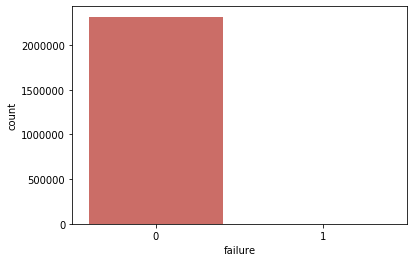

In [12]:
sns.countplot(x=df.failure,palette='hls')

In [13]:
print(df.groupby('model')['failure'].sum().sort_values(ascending=False))

model
HGST HMS5C4040BLE640       37
Hitachi HDS5C3030ALA630    10
HGST HMS5C4040ALE640        6
Hitachi HDS723030ALA640     4
Hitachi HDS5C4040ALE630     1
Hitachi HDT725025VLA380     0
Hitachi HDS724040ALE640     0
Hitachi HDS723030BLE640     0
Hitachi HDS722020ALA330     0
Hitachi HDS5C3030BLE630     0
HGST HUH728080ALE600        0
HGST HDS724040ALE640        0
HGST HDS5C4040ALE630        0
Name: failure, dtype: int64


In [14]:
df['serial_number'].unique()

array(['MJ0351YNG9Z0XA', 'MJ0351YNG9WJSA', 'PL1321LAG34XWH', ...,
       'PL1331LAH3DNUH', 'PL1331LAHGARDH', 'PL2331LAH8U4WJ'], dtype=object)

In [15]:
len(df['serial_number'].unique().tolist())

32257

In [16]:
d=df.groupby('serial_number')['failure'].sum().sort_values(ascending=False)
d.head(10)

serial_number
PL1331LAHD69AH    1
PL1331LAHD10SH    1
PL1331LAHGBW1H    1
PL2331LAHBT62J    1
PL1331LAHDDWUH    1
MJ1311YNG3E8MA    1
MK0311YHGKKSEA    1
PL2331LAHBX2HJ    1
PL2331LAH5SXDJ    1
PL1331LAHD210H    1
Name: failure, dtype: int64

In [17]:
data_aggregate = (df[['date','serial_number','failure']].groupby('serial_number',as_index = True)
                .agg({'date':'count', 'failure':'sum'})
                .rename(columns={'date': 'date_count', 'failure': 'failure_sum'})
                .sort_values(by=['failure_sum'],axis=0,ascending=False))
data_aggregate

,date_count,failure_sum
serial_number,,
PL1321LAG31X7H,22,1
MJ1311YNG3E8MA,66,1
PL1331LAHG20PH,3,1
PL1331LAHG20AH,3,1
PL2331LAHAWTEJ,77,1
...,...,...
PL1331LAGS3VUH,86,0
PL1331LAGS3VKH,86,0
PL1331LAGS3VGH,86,0


number of disks :  32257
number of failed disks:  58
percentage of broken disks:  0.17980593359580865 %


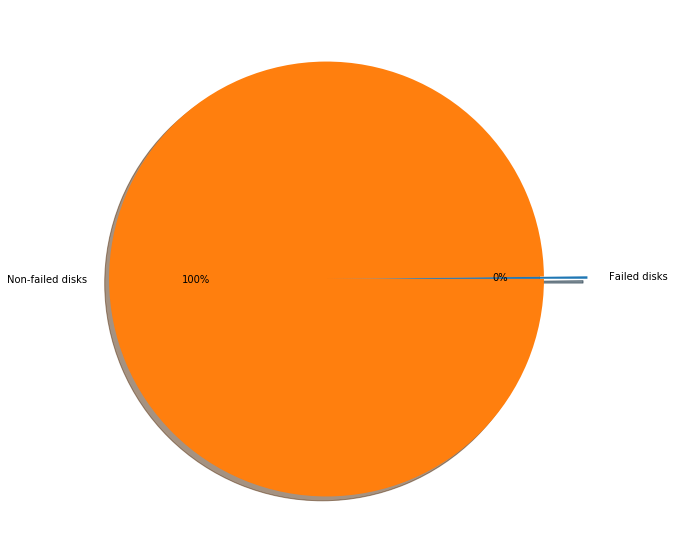

In [18]:
all_count = data_aggregate.shape[0]
broken_count = data_aggregate[data_aggregate.iloc[:, 1] >= 1].shape[0]
print ('number of disks : ',all_count)
print ('number of failed disks: ',broken_count)
print ('percentage of broken disks: ',broken_count/all_count*100,'%' )
fig = plt.figure(figsize=(10,10))
labels = ['Failed disks','Non-failed disks']
shares = [broken_count,all_count-broken_count] 
plt.pie(shares,explode=(0.2,0),labels=labels,autopct='%.0f%%',shadow=True,)
plt.show()

In [19]:
data_aggregate = (df[['model','failure']].groupby('model',as_index = True)
                .agg({'model':'count', 'failure':'sum'})
                .rename(columns={'date': 'date_count', 'failure': 'failure_sum'})
                .sort_values(by=['failure_sum'],axis=0,ascending=False))
data_aggregate

,model,failure_sum
model,,
HGST HMS5C4040BLE640,959967,37
Hitachi HDS5C3030ALA630,383788,10
HGST HMS5C4040ALE640,644282,6
Hitachi HDS723030ALA640,83918,4
Hitachi HDS5C4040ALE630,225686,1
HGST HDS5C4040ALE630,7074,0
HGST HDS724040ALE640,3440,0
HGST HUH728080ALE600,3870,0
Hitachi HDS5C3030BLE630,86,0


number of disks :  13
number of failed disks:  5
percentage of broken disks:  38.46153846153847 %


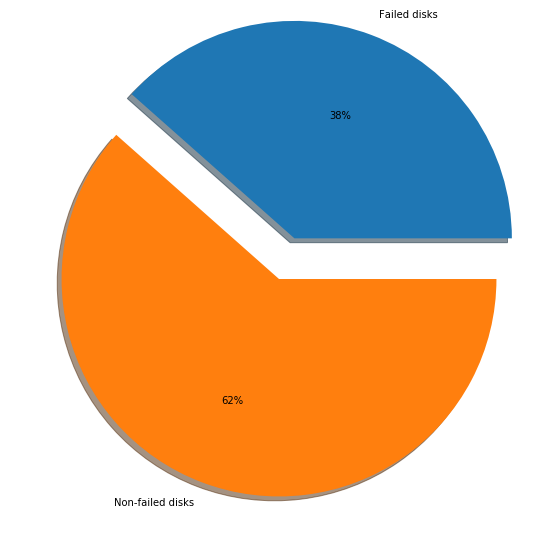

In [20]:
all_count = data_aggregate.shape[0]
broken_count = data_aggregate[data_aggregate.iloc[:, 1] >= 1].shape[0]
print ('number of disks : ',all_count)
print ('number of failed disks: ',broken_count)
print ('percentage of broken disks: ',broken_count/all_count*100,'%' )

fig = plt.figure(figsize=(10,10))
labels = ['Failed disks','Non-failed disks']
shares = [broken_count,all_count-broken_count] 
plt.pie(shares,explode=(0.2,0),labels=labels,autopct='%.0f%%',shadow=True,)
plt.show()

### Remove duplicated columns

In [21]:
data_dropped = df.drop_duplicates()
data_dropped.shape

(2316371, 22)

#### Extracting all of the drive models

In [22]:
data_dropped.model.unique()

array(['Hitachi HDS5C3030ALA630', 'Hitachi HDS5C4040ALE630',
       'HGST HMS5C4040BLE640', 'HGST HMS5C4040ALE640',
       'Hitachi HDS723030ALA640', 'HGST HUH728080ALE600',
       'HGST HDS724040ALE640', 'Hitachi HDS5C3030BLE630',
       'Hitachi HDS724040ALE640', 'HGST HDS5C4040ALE630',
       'Hitachi HDS723030BLE640', 'Hitachi HDT725025VLA380',
       'Hitachi HDS722020ALA330'], dtype=object)

#### Counting number of failed Hitachi drives

### Normalize Data

In [23]:
df.columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_raw', 'smart_2_raw', 'smart_3_raw', 'smart_4_raw',
       'smart_5_raw', 'smart_7_raw', 'smart_8_raw', 'smart_9_raw',
       'smart_10_raw', 'smart_12_raw', 'smart_192_raw', 'smart_193_raw',
       'smart_194_raw', 'smart_196_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw'],
      dtype='object')

In [24]:
df.shape

(2316371, 22)

In [25]:
dfnw=df.drop(['date', 'serial_number', 'model', 'capacity_bytes','failure'], axis=1)

In [26]:
dfnw = dfnw.reset_index(drop= True)
print(dfnw.shape)
dfnw.head()

(2316371, 17)


,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw
0,0.0,108.0,554.0,15.0,0.0,0.0,37.0,36714.0,0.0,15.0,410.0,410.0,28.0,0.0,0.0,0.0,0.0
1,0.0,104.0,555.0,21.0,2.0,0.0,37.0,36780.0,0.0,21.0,450.0,450.0,23.0,2.0,0.0,0.0,0.0
2,0.0,101.0,560.0,31.0,0.0,0.0,42.0,33373.0,0.0,31.0,42.0,42.0,29.0,0.0,0.0,0.0,0.0
3,0.0,104.0,507.0,17.0,0.0,0.0,37.0,35424.0,0.0,17.0,441.0,441.0,26.0,0.0,0.0,0.0,0.0
4,0.0,104.0,448.0,5.0,0.0,0.0,44.0,23221.0,0.0,5.0,234.0,234.0,28.0,0.0,0.0,0.0,0.0


In [28]:
dfnw.describe()

,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw
count,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06
mean,9.021863e+04,9.568344e+01,3.940531e+02,1.231292e+01,9.338146e-01,1.471229e+00,3.812373e+01,2.218812e+04,5.262775e+01,1.210952e+01,2.841509e+02,2.863148e+02,2.661043e+01,1.202561e+00,1.083592e-02,1.972914e-04,4.228705e+01
std,6.363967e+06,2.553099e+01,2.199170e+02,1.782339e+01,2.320811e+01,1.603106e+03,1.062432e+01,1.423446e+04,3.403274e+03,1.592276e+01,6.185728e+02,8.891302e+02,3.366838e+00,2.972899e+01,7.735605e-01,1.129984e-01,2.696936e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+02,4.190000e+02,5.000000e+00,0.000000e+00,0.000000e+00,4.100000e+01,7.223000e+03,0.000000e+00,5.000000e+00,2.300000e+01,2.300000e+01,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.020000e+02,4.540000e+02,8.000000e+00,0.000000e+00,0.000000e+00,4.200000e+01,2.275900e+04,0.000000e+00,8.000000e+00,1.370000e+02,1.370000e+02,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.040000e+02,5.580000e+02,1.700000e+01,0.000000e+00,0.000000e+00,4.200000e+01,3.408000e+04,0.000000e+00,1.700000e+01,3.120000e+02,3.120000e+02,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.230864e+09,2.670000e+02,6.670000e+02,8.530000e+02,1.886000e+03,2.424860e+06,1.170000e+02,6.794600e+04,3.932180e+05,8.240000e+02,6.553500e+04,1.266950e+05,5.100000e+01,2.044000e+03,3.920000e+02,6.500000e+01,4.027290e+05


In [27]:
mms = MinMaxScaler()
cols = dfnw.keys()
normalized_data = pd.DataFrame(mms.fit_transform(dfnw), columns= cols)
normalized_data.head()

,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw
0,0.0,0.404494,0.830585,0.016432,0.00000,0.0,0.316239,0.540341,0.0,0.017011,0.006241,0.003228,0.342857,0.000000,0.0,0.0,0.0
1,0.0,0.389513,0.832084,0.023474,0.00106,0.0,0.316239,0.541312,0.0,0.024301,0.006851,0.003544,0.200000,0.000978,0.0,0.0,0.0
2,0.0,0.378277,0.839580,0.035211,0.00000,0.0,0.358974,0.491169,0.0,0.036452,0.000626,0.000324,0.371429,0.000000,0.0,0.0,0.0
3,0.0,0.389513,0.760120,0.018779,0.00000,0.0,0.316239,0.521355,0.0,0.019441,0.006714,0.003473,0.285714,0.000000,0.0,0.0,0.0
4,0.0,0.389513,0.671664,0.004695,0.00000,0.0,0.376068,0.341757,0.0,0.004860,0.003555,0.001839,0.342857,0.000000,0.0,0.0,0.0


In [28]:
normalized_data.describe()

,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw
count,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06,2.316371e+06
mean,4.044111e-05,3.583649e-01,5.907842e-01,1.327808e-02,4.951297e-04,6.067274e-07,3.258438e-01,3.265551e-01,1.338386e-04,1.349881e-02,4.320672e-03,2.251999e-03,3.031551e-01,5.883370e-04,2.764264e-05,3.035252e-06,1.050013e-04
std,2.852691e-03,9.562169e-02,3.297106e-01,2.091947e-02,1.230547e-02,6.611130e-04,9.080614e-02,2.094966e-01,8.654930e-03,1.934722e-02,9.438960e-03,7.017934e-03,9.619537e-02,1.454452e-02,1.973369e-03,1.738437e-03,6.696653e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,3.745318e-01,6.281859e-01,4.694836e-03,0.000000e+00,0.000000e+00,3.504274e-01,1.063050e-01,0.000000e+00,4.860267e-03,3.357036e-04,1.736467e-04,2.285714e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,3.820225e-01,6.806597e-01,8.215962e-03,0.000000e+00,0.000000e+00,3.589744e-01,3.349572e-01,0.000000e+00,8.505468e-03,2.075259e-03,1.073453e-03,2.857143e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,3.895131e-01,8.365817e-01,1.877934e-02,0.000000e+00,0.000000e+00,3.589744e-01,5.015748e-01,0.000000e+00,1.944107e-02,4.745628e-03,2.454733e-03,3.714286e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [29]:
normalized_data["failure"]=df.failure

In [30]:
new_col = list(normalized_data.columns)
new_col = [new_col[-1]] + new_col[:-1]
normalized = normalized_data[new_col]
normalized.head()

,failure,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_8_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw
0,0,0.0,0.404494,0.830585,0.016432,0.00000,0.0,0.316239,0.540341,0.0,0.017011,0.006241,0.003228,0.342857,0.000000,0.0,0.0,0.0
1,0,0.0,0.389513,0.832084,0.023474,0.00106,0.0,0.316239,0.541312,0.0,0.024301,0.006851,0.003544,0.200000,0.000978,0.0,0.0,0.0
2,0,0.0,0.378277,0.839580,0.035211,0.00000,0.0,0.358974,0.491169,0.0,0.036452,0.000626,0.000324,0.371429,0.000000,0.0,0.0,0.0
3,0,0.0,0.389513,0.760120,0.018779,0.00000,0.0,0.316239,0.521355,0.0,0.019441,0.006714,0.003473,0.285714,0.000000,0.0,0.0,0.0
4,0,0.0,0.389513,0.671664,0.004695,0.00000,0.0,0.376068,0.341757,0.0,0.004860,0.003555,0.001839,0.342857,0.000000,0.0,0.0,0.0


In [31]:
normalized.shape

(2316371, 18)

In [32]:
normalized.isnull().sum()

failure          0
smart_1_raw      0
smart_2_raw      0
smart_3_raw      0
smart_4_raw      0
smart_5_raw      0
smart_7_raw      0
smart_8_raw      0
smart_9_raw      0
smart_10_raw     0
smart_12_raw     0
smart_192_raw    0
smart_193_raw    0
smart_194_raw    0
smart_196_raw    0
smart_197_raw    0
smart_198_raw    0
smart_199_raw    0
dtype: int64

## Classification

## Feature Selecton

1. Remove highly correlated features
2. Remove features with low variance
3. Univariate Selection
4. Recursive Feature Elimination w/ Cross-Validation
5. Feature Importance

### Remove highly correlated features

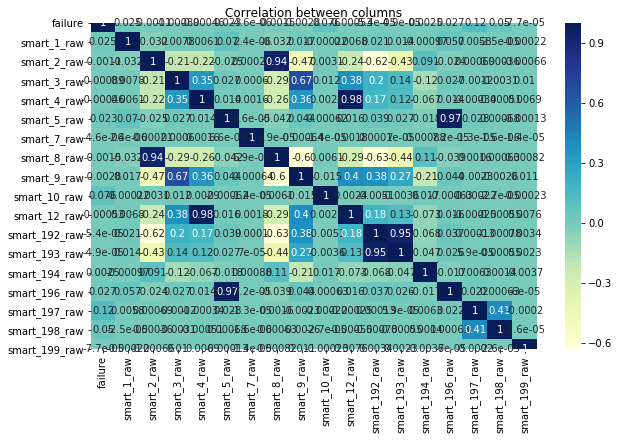

In [33]:
f,ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(normalized.corr(), annot = True, cmap="YlGnBu", cbar=True, xticklabels=True, yticklabels=True)
plt.title("Correlation between columns")
plt.show()

In [34]:
corr_matrix = normalized.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print("Droped column: {}".format(to_drop))

normalized = normalized.drop(normalized[to_drop], axis=1)
print(normalized.shape)
normalized.head()

Droped column: ['smart_8_raw', 'smart_12_raw', 'smart_193_raw', 'smart_196_raw']
(2316371, 14)


,failure,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_192_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw
0,0,0.0,0.404494,0.830585,0.016432,0.00000,0.0,0.540341,0.0,0.006241,0.342857,0.0,0.0,0.0
1,0,0.0,0.389513,0.832084,0.023474,0.00106,0.0,0.541312,0.0,0.006851,0.200000,0.0,0.0,0.0
2,0,0.0,0.378277,0.839580,0.035211,0.00000,0.0,0.491169,0.0,0.000626,0.371429,0.0,0.0,0.0
3,0,0.0,0.389513,0.760120,0.018779,0.00000,0.0,0.521355,0.0,0.006714,0.285714,0.0,0.0,0.0
4,0,0.0,0.389513,0.671664,0.004695,0.00000,0.0,0.341757,0.0,0.003555,0.342857,0.0,0.0,0.0


#### smart_8_raw,smart_12_raw,smart_193_raw,smart_196_raw  are dropped

In [35]:
X=normalized.iloc[:,1:]
y=normalized.iloc[:,0]

In [36]:
X.head()

,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_192_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw
0,0.0,0.404494,0.830585,0.016432,0.00000,0.0,0.540341,0.0,0.006241,0.342857,0.0,0.0,0.0
1,0.0,0.389513,0.832084,0.023474,0.00106,0.0,0.541312,0.0,0.006851,0.200000,0.0,0.0,0.0
2,0.0,0.378277,0.839580,0.035211,0.00000,0.0,0.491169,0.0,0.000626,0.371429,0.0,0.0,0.0
3,0.0,0.389513,0.760120,0.018779,0.00000,0.0,0.521355,0.0,0.006714,0.285714,0.0,0.0,0.0
4,0.0,0.389513,0.671664,0.004695,0.00000,0.0,0.341757,0.0,0.003555,0.342857,0.0,0.0,0.0


### Recursive Feature Elimination with 5 Fold Cross Validation

In [ ]:
from imblearn.over_sampling import SMOTE
def Average(lst): 
    return sum(lst) / len(lst) 

# Create Cross Validator
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

F1_acc = []
bacc = []
votes = []
accs = []
support = []
for trainIndex, textIndex in skf.split(X, y):
    X_train, xTest = X.iloc[trainIndex], X.iloc[textIndex]
    y_train, yTest = y.iloc[trainIndex], y.iloc[textIndex]
    
    #---------------------------------------------
    #print("\nSMOTE")
    sm = SMOTE(kind='regular',k_neighbors=2)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())
    #----------------------------------------------

    # create the RFE model and select 5 attributes
    #model = LogisticRegression(solver="liblinear", multi_class="auto")
    model = DecisionTreeClassifier()
    rfe = RFE(model, 5)
    rfe = rfe.fit(X_train_smote, y_train_smote.ravel())
    
    X_train_smote = rfe.transform( X_train_smote)
    xTest = rfe.transform(xTest)
    
    votes.append(rfe.ranking_)
    support.append(rfe.support_)
    
    # create a base classifier used to evaluate a subset of attributes
    a=model.fit(X_train_smote, y_train_smote.ravel())
    accs.append(model.score(xTest, np.ravel(yTest.values)))
    
    yPred = a.predict(xTest)
    cnf_matrix = confusion_matrix(yTest,yPred)
    F1_acc.append(f1_score(yTest, yPred, average="macro", labels=np.unique( yPred)))
    bacc.append(balanced_accuracy_score(yTest, yPred))

print('Optimal number of features: {}'.format(rfe.n_features_))
features = X.columns[rfe.get_support(indices=True)].tolist()
print('Selected features: {}'.format(features))
print('cnf matrix:\n {}'.format(cnf_matrix))
print('\nBalanced Accuracy Score: {}'.format(bacc))
print('Balanced Accuracy Score Mean Value: {}'.format(Average(bacc)))
print('\nF1_score: {}'.format(F1_acc))
print('F1_score Mean Value: {}'.format(Average(F1_acc)))
print('\nAccuracy: {}'.format(accs))
print('Accuracy Mean: {}'.format(Average(accs)))
print('\nRFE ranking: \n')
print(pd.DataFrame(votes))
print(pd.DataFrame(votes).mean(axis=0))

In [ ]:
###

In [38]:
d = pd.DataFrame()
d['Ranking'] = pd.DataFrame(votes).mean(axis=0)
d['features'] = ['smart_1_raw', 'smart_2_raw', 'smart_3_raw', 'smart_4_raw',
       'smart_5_raw', 'smart_7_raw', 'smart_9_raw', 'smart_10_raw',
       'smart_192_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw']
d.sort_values(by=['Ranking'], ascending=True)

,Ranking,features
6,1.0,smart_9_raw
9,1.0,smart_194_raw
10,1.0,smart_197_raw
4,1.4,smart_5_raw
2,2.2,smart_3_raw
3,2.2,smart_4_raw
1,3.2,smart_2_raw
8,3.4,smart_192_raw
7,5.4,smart_10_raw
0,5.6,smart_1_raw


#### Literature
#### SMART parameters number 5, 12, 187, 188, 189, 190, 198, 199 and 200. 

(but only 'smart_12_raw', 'smart_5_raw', 'smart_198_raw', 'smart_199_raw' are in this data set )

#### Selected features using RFE: 
['smart_4_raw', 'smart_5_raw', 'smart_9_raw', 'smart_197_raw', 'smart_194_raw','smart_3_raw','smart_2_raw','smart_192_raw','smart_10_raw' 
but only 'smart_9_raw', 'smart_194_raw', 'smart_197_raw', 'smart_5_raw' available

### DecisionTreeClassifier for selected features

In [37]:
Xselected=X.loc[:,['smart_9_raw', 'smart_194_raw', 'smart_197_raw', 'smart_5_raw']]

In [38]:
yselected=y

In [39]:
skFold=StratifiedKFold(n_splits=5)

In [40]:
print(skFold)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [41]:
skFold.get_n_splits(X,y)

5

In [42]:
def plot_cm(cnf_matrix, normalize=False):
    cm = confusion_matrix(y_test, y_pred)
    # print(cm)
    ax = sns.heatmap(cm, annot=True, cbar=False, fmt='g', cmap=plt.cm.Oranges)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + .5, top - .5)
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion Matrix")

TRAIN: [ 340277  344757  403865 ... 2316368 2316369 2316370] TEST: [     0      1      2 ... 463276 463277 463278]
Size X_train = (1853096, 4)
Size X_test = (463275, 4)

SMOTE
Size X_train_smote =(3706100, 4)

Decision Tree Classifier
classifier_accuracy = 98.94533484431494%


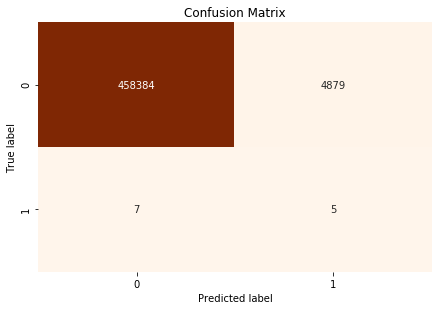

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    463263
           1       0.00      0.42      0.00        12

    accuracy                           0.99    463275
   macro avg       0.50      0.70      0.50    463275
weighted avg       1.00      0.99      0.99    463275

TRAIN: [      0       1       2 ... 2316368 2316369 2316370] TEST: [340277 344757 403865 ... 926547 926548 926549]
Size X_train = (1853096, 4)
Size X_test = (463275, 4)

SMOTE
Size X_train_smote =(3706100, 4)

Decision Tree Classifier
classifier_accuracy = 99.25897145324052%


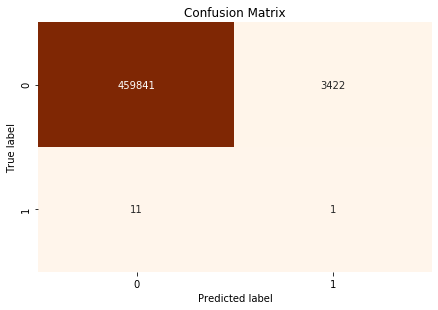

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    463263
           1       0.00      0.08      0.00        12

    accuracy                           0.99    463275
   macro avg       0.50      0.54      0.50    463275
weighted avg       1.00      0.99      1.00    463275

TRAIN: [      0       1       2 ... 2316368 2316369 2316370] TEST: [ 926550  926551  926552 ... 1389822 1389823 1408403]
Size X_train = (1853096, 4)
Size X_test = (463275, 4)

SMOTE
Size X_train_smote =(3706100, 4)

Decision Tree Classifier
classifier_accuracy = 98.77308294209702%


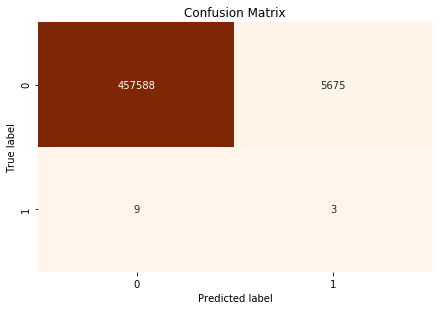

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    463263
           1       0.00      0.25      0.00        12

    accuracy                           0.99    463275
   macro avg       0.50      0.62      0.50    463275
weighted avg       1.00      0.99      0.99    463275

TRAIN: [      0       1       2 ... 2316368 2316369 2316370] TEST: [1389824 1389825 1389826 ... 1853095 1951673 1971135]
Size X_train = (1853098, 4)
Size X_test = (463273, 4)

SMOTE
Size X_train_smote =(3706102, 4)

Decision Tree Classifier
classifier_accuracy = 99.17845417280955%


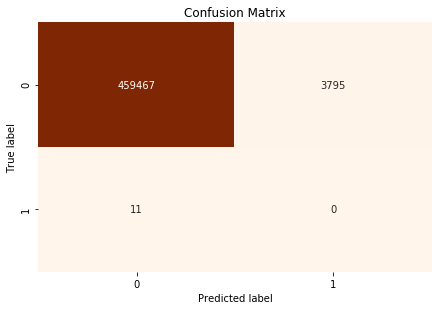

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    463262
           1       0.00      0.00      0.00        11

    accuracy                           0.99    463273
   macro avg       0.50      0.50      0.50    463273
weighted avg       1.00      0.99      1.00    463273

TRAIN: [      0       1       2 ... 1853095 1951673 1971135] TEST: [1853096 1853097 1853098 ... 2316368 2316369 2316370]
Size X_train = (1853098, 4)
Size X_test = (463273, 4)

SMOTE
Size X_train_smote =(3706102, 4)

Decision Tree Classifier
classifier_accuracy = 97.80841965752374%


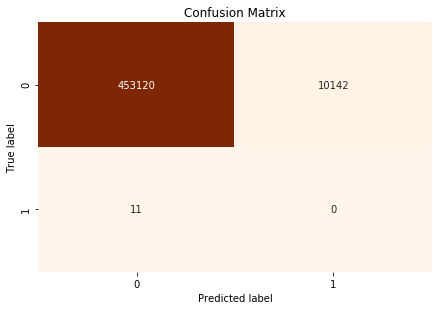

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    463262
           1       0.00      0.00      0.00        11

    accuracy                           0.98    463273
   macro avg       0.50      0.49      0.49    463273
weighted avg       1.00      0.98      0.99    463273



In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
X=Xselected
y=yselected
for train_index, test_index in skFold.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("Size X_train = " + str(X_train.shape))
    print("Size X_test = " +str(X_test.shape))
    #---------------------------------------------
    print("\nSMOTE")
    sm = SMOTE(random_state=0)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())
    print("Size X_train_smote =" +str(X_train_smote.shape))
    
    #----------------------------------------------
    print("\nDecision Tree Classifier")
    classifier = DecisionTreeClassifier()  
    classifier.fit(X_train_smote, y_train_smote)
    classifier_accuracy = classifier.score(X_test,y_test)
    print("classifier_accuracy = {}%".format(classifier_accuracy*100))
    #----------------------------------------------
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    #print(cnf_matrix)
    #class_names = [0,1]
    #x_axis_labels = [0,1]
    #y_axis_labels = [0,1]
    #sns.heatmap(cnf_matrix,annot=True,cbar=False,xticklabels=x_axis_labels, yticklabels=y_axis_labels,fmt="g",cmap='viridis')
    #plt.ylabel('True Label')
    #plt.xlabel('Predicted Label')
    #plt.title('Confusion Matrix')
   #print(classification_report(y_test,y_pred))
    #print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

    plt.figure()
    plot_cm(cnf_matrix)
    plt.show()
    print(classification_report(y_test,y_pred))


In [43]:
cnf_matrix

array([[453103,  10159],
       [    11,      0]], dtype=int64)

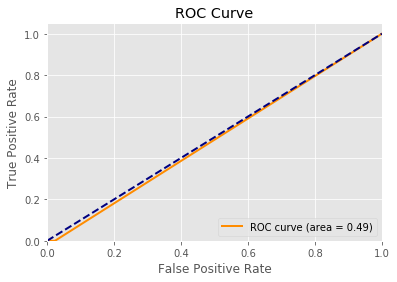

In [44]:
plt.style.use('ggplot')

y_predict_probabilities = classifier.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### DecisionTreeClassifier for Literature

In [45]:
Xselected=X.loc[:,['smart_12_raw', 'smart_5_raw', 'smart_198_raw', 'smart_199_raw']]

c:\users\upeksha\assignment3venv\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [46]:
Xselected.head()

,smart_12_raw,smart_5_raw,smart_198_raw,smart_199_raw
0,NaN,0.00000,NaN,NaN
1,NaN,0.00106,NaN,NaN
2,NaN,0.00000,NaN,NaN
3,NaN,0.00000,NaN,NaN
4,NaN,0.00000,NaN,NaN


In [47]:
Xselected=Xselected.drop('smart_12_raw', axis=1)

In [48]:
Xselected=Xselected.drop('smart_198_raw', axis=1)

In [49]:
Xselected=Xselected.drop('smart_199_raw', axis=1)

In [50]:
Xselected.head()

,smart_5_raw
0,0.00000
1,0.00106
2,0.00000
3,0.00000
4,0.00000


In [51]:
skFold=StratifiedKFold(n_splits=5)
print(skFold)
skFold.get_n_splits(X,y)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


5

TRAIN: [ 340277  344757  403865 ... 2316368 2316369 2316370] TEST: [     0      1      2 ... 463276 463277 463278]
Size X_train = (1853096, 1)
Size X_test = (463275, 1)

SMOTE
Size X_train_smote =(3706100, 1)

Decision Tree Classifier
classifier_accuracy = 99.8033565376936%


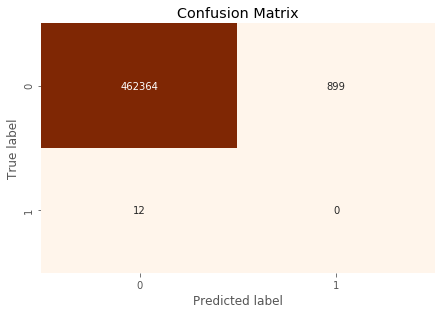

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    463263
           1       0.00      0.00      0.00        12

    accuracy                           1.00    463275
   macro avg       0.50      0.50      0.50    463275
weighted avg       1.00      1.00      1.00    463275

TRAIN: [      0       1       2 ... 2316368 2316369 2316370] TEST: [340277 344757 403865 ... 926547 926548 926549]
Size X_train = (1853096, 1)
Size X_test = (463275, 1)

SMOTE
Size X_train_smote =(3706100, 1)

Decision Tree Classifier
classifier_accuracy = 99.97668771248178%


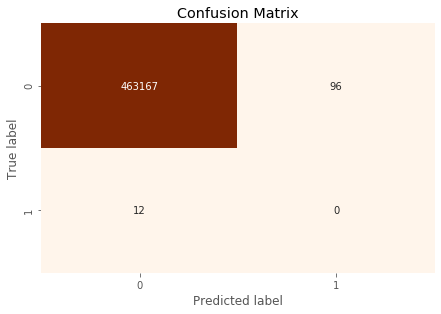

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    463263
           1       0.00      0.00      0.00        12

    accuracy                           1.00    463275
   macro avg       0.50      0.50      0.50    463275
weighted avg       1.00      1.00      1.00    463275

TRAIN: [      0       1       2 ... 2316368 2316369 2316370] TEST: [ 926550  926551  926552 ... 1389822 1389823 1408403]
Size X_train = (1853096, 1)
Size X_test = (463275, 1)

SMOTE
Size X_train_smote =(3706100, 1)

Decision Tree Classifier
classifier_accuracy = 99.82904322486644%


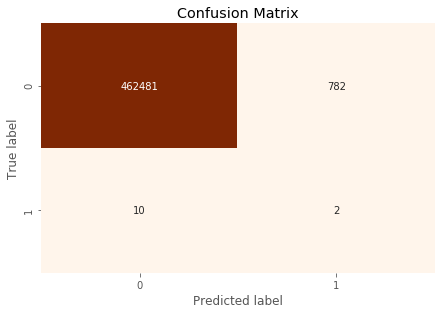

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    463263
           1       0.00      0.17      0.01        12

    accuracy                           1.00    463275
   macro avg       0.50      0.58      0.50    463275
weighted avg       1.00      1.00      1.00    463275

TRAIN: [      0       1       2 ... 2316368 2316369 2316370] TEST: [1389824 1389825 1389826 ... 1853095 1951673 1971135]
Size X_train = (1853098, 1)
Size X_test = (463273, 1)

SMOTE
Size X_train_smote =(3706102, 1)

Decision Tree Classifier
classifier_accuracy = 99.82645222147633%


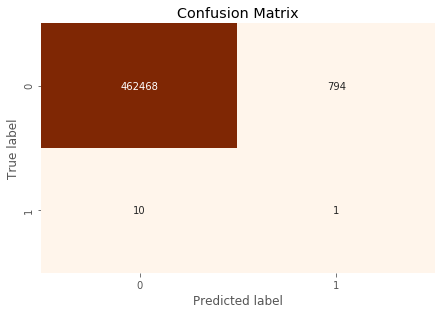

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    463262
           1       0.00      0.09      0.00        11

    accuracy                           1.00    463273
   macro avg       0.50      0.54      0.50    463273
weighted avg       1.00      1.00      1.00    463273

TRAIN: [      0       1       2 ... 1853095 1951673 1971135] TEST: [1853096 1853097 1853098 ... 2316368 2316369 2316370]
Size X_train = (1853098, 1)
Size X_test = (463273, 1)

SMOTE
Size X_train_smote =(3706102, 1)

Decision Tree Classifier
classifier_accuracy = 99.85105974231176%


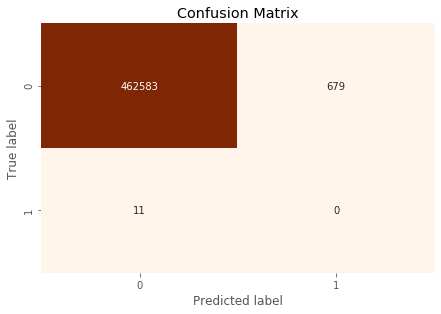

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    463262
           1       0.00      0.00      0.00        11

    accuracy                           1.00    463273
   macro avg       0.50      0.50      0.50    463273
weighted avg       1.00      1.00      1.00    463273



In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
X=Xselected
y=yselected
for train_index, test_index in skFold.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print("Size X_train = " + str(X_train.shape))
    print("Size X_test = " +str(X_test.shape))
    #---------------------------------------------
    print("\nSMOTE")
    sm = SMOTE(random_state=0)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())
    print("Size X_train_smote =" +str(X_train_smote.shape))
    
    #----------------------------------------------
    print("\nDecision Tree Classifier")
    classifier = DecisionTreeClassifier()  
    classifier.fit(X_train_smote, y_train_smote)
    classifier_accuracy = classifier.score(X_test,y_test)
    print("classifier_accuracy = {}%".format(classifier_accuracy*100))
    #----------------------------------------------
    #y_pred = classifier.predict(X_test)
    #cnf_matrix = confusion_matrix(y_test,y_pred)
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    #print(cnf_matrix)
    #class_names = [0,1]
    #x_axis_labels = [0,1]
    #y_axis_labels = [0,1]
    #sns.heatmap(cnf_matrix,annot=True,cbar=False,xticklabels=x_axis_labels, yticklabels=y_axis_labels,fmt="g",cmap='viridis')
    #plt.ylabel('True Label')
    #plt.xlabel('Predicted Label')
    #plt.title('Confusion Matrix')
   #print(classification_report(y_test,y_pred))
    #print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

    plt.figure()
    plot_cm(cnf_matrix)
    plt.show()
    print(classification_report(y_test,y_pred))



In [53]:
cnf_matrix

array([[462583,    679],
       [    11,      0]], dtype=int64)

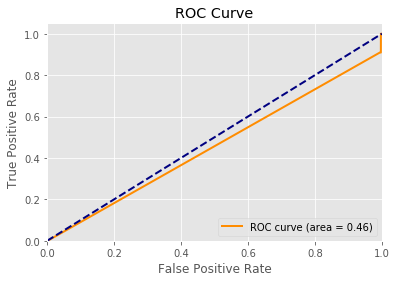

In [54]:
plt.style.use('ggplot')

y_predict_probabilities = classifier.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()